# Gradient descent on point mass

In [86]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
import numpy as np
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project_spatial, project, rotate
from src.interpolate import *
import jax
import jax.numpy as jnp

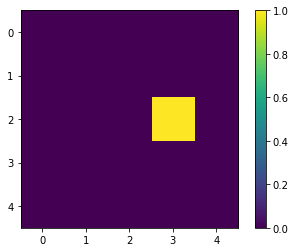

In [220]:
nx = 5
shape = np.array([nx, nx, nx])
dimensions = np.array([1, 1, 1])
radius = 1/(2*nx)
centre = np.array([0.2,0,0])
intensity = 1

v = jnp.array(spherical_volume(shape, dimensions, centre, radius, intensity, False))
plt.imshow(v[:,:,2]); plt.colorbar()

angles = np.array([0,0,0])

In [199]:
#v_proj = project_spatial(v, [0,0,np.pi/2], dimensions, "tri")
#plt.imshow(v_proj); plt.colorbar()

## Define the functions

In [316]:
v_func = lambda a: project_spatial(v, a, dimensions, "tri")
a_true = jnp.array([np.pi, np.pi/4*3, np.pi/3*5])
img1 = v_func(a_true)
loss_func = jax.jit(lambda a: 1/(2*25) * jnp.sum((v_func(a) - img1)**2))
dloss = jax.grad(loss_func)

## Run gradient descent

In [427]:
a0 = np.random.rand()*2*np.pi * jnp.ones(3)
#a0 = np.pi/2 + 0.1
alpha = 1/beta
a = a0
iters = 3000
l1 = 0
y1 = a
for i in range(iters):
    if np.mod(i,100) == 0:
        print(str(i) + ": loss = " + str(loss_func(a)))
        
    l0 = l1    
    l1 = (1 + jnp.sqrt(1 + 4 * l0**2))/2 
    g = (1-l0)/l1
    
    y0 = y1
    y1 = a - alpha * dloss(a)
    a = (1-g)*y1 + g*y0
    


0: loss = 0.036889907
100: loss = 0.03270166
200: loss = 0.03269508
300: loss = 0.03269508
400: loss = 0.03269508
500: loss = 0.03269508
600: loss = 0.032695077
700: loss = 0.03269508
800: loss = 0.03269508
900: loss = 0.03269508
1000: loss = 0.03269508
1100: loss = 0.03269508
1200: loss = 0.03269508
1300: loss = 0.03269508
1400: loss = 0.03269508
1500: loss = 0.03269508
1600: loss = 0.03269508
1700: loss = 0.032695077
1800: loss = 0.03269508
1900: loss = 0.03269508
2000: loss = 0.03269508
2100: loss = 0.032695085
2200: loss = 0.03269508
2300: loss = 0.03269508
2400: loss = 0.03269508
2500: loss = 0.03269508
2600: loss = 0.03269508
2700: loss = 0.03269508
2800: loss = 0.03269508
2900: loss = 0.03269508


In [418]:
print(a_true)
print(a)
print(g)

[3.1415927 2.3561945 5.2359877]
[4.056056  5.356936  4.0832605]
-0.9997001


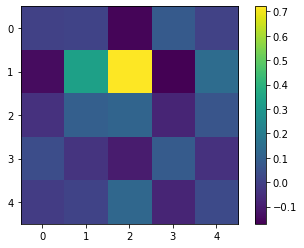

In [404]:
plt.imshow(v_func(a_true)); plt.colorbar()

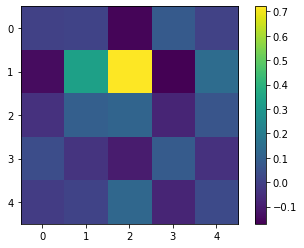

In [405]:
plt.imshow(v_func(a)); plt.colorbar()

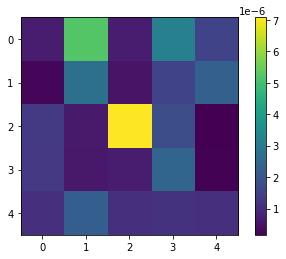

In [406]:
plt.imshow(abs(v_func(a) - v_func(a_true))); plt.colorbar()